# QCTO - Workplace Module

### Project Title: Exploring Trends in Avocado Sales and Pricing: A Data-Driven Analysis (2015-2023)
#### Done By: Jamie Hamann

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

https://github.com/Jamiehamann03/QCTO-Project

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [1]:
#Importing necessary python libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

**CHARACTERISTICS**
The dataset was downloaded on Kaggle.
The data was collected from retail stores and distribution networks
**Size** :This dataset contains thousands of rows and only 12 columns 
**Types of data** :**Numerical**(Prices; Volume; Total Sales); **Categorical**(Region; Type of Avacados); **Date/Time**(Year;Month;Day;Etc)
**Scope** :Regional breakdowns for avacado sales. It spans from 2015 to 2023(longitudinal trends) 

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [2]:
file_path = r"C:\Users\jamie\Downloads\archive (4)\Avocado_HassAvocadoBoard_20152023v1.0.1.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


In [4]:
# Get basic info about the dataset (number of rows, columns, and data types)
df.info()

# Summary statistics for numerical columns
df.describe()

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.9+ MB
Date                0
AveragePrice        0
TotalVolume         0
plu4046             0
plu4225             0
plu4770             0
TotalBags           0
SmallBags       12390
LargeBags       12390
XLargeBags      12390
type             

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [5]:


# Loop through each column in the dataset
for column in df.columns:
    if df[column].dtype == 'object':  # If the column is categorical
        # Fill missing values in categorical columns with mode
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        # Fill missing values in numerical columns with mean
        df[column] = df[column].fillna(df[column].mean())

# Verify that missing values are handled
print("Missing values after filling:\n", df.isnull().sum())


duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

df_cleaned = df.drop_duplicates()

df_cleaned.info()

df_cleaned.to_csv('cleaned_avocado_dataset.csv', index=False)


Missing values after filling:
 Date            0
AveragePrice    0
TotalVolume     0
plu4046         0
plu4225         0
plu4770         0
TotalBags       0
SmallBags       0
LargeBags       0
XLargeBags      0
type            0
region          0
dtype: int64
Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     53415 non-null  float64
 8   LargeBags     53415 non-null  float64
 9   XLargeBags    53415 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
d

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


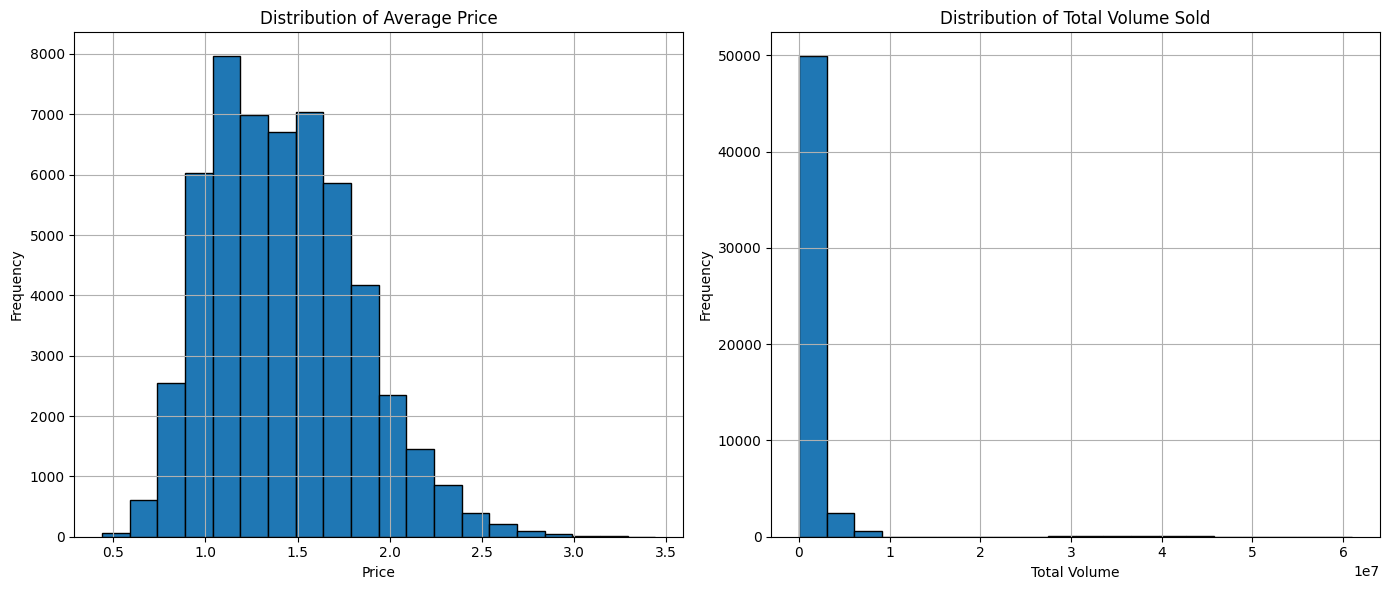

In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Avocado_HassAvocadoBoard_20152023v1.0.1.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Plotting histograms
plt.figure(figsize=(14, 6))

# Histogram for 'Average Price'
plt.subplot(1, 2, 1)
data['AveragePrice'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Average Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram for 'Total Volume'
plt.subplot(1, 2, 2)
data['TotalVolume'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Total Volume Sold')
plt.xlabel('Total Volume')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


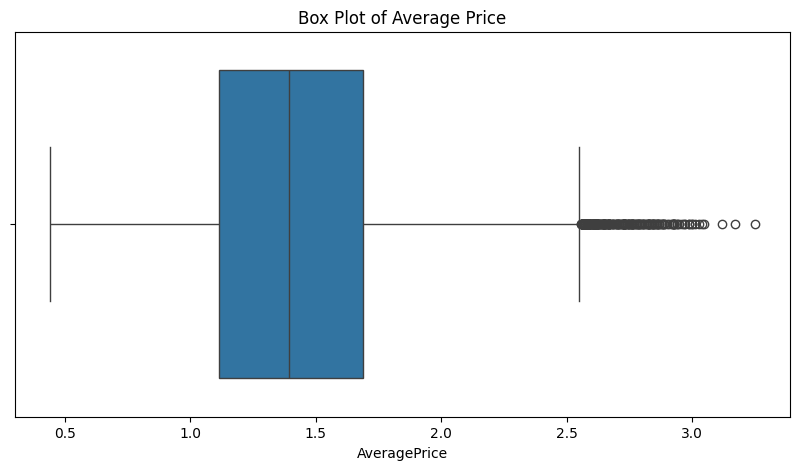

In [19]:
#Box Plot to Detect Outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x='AveragePrice', data=data)
plt.title('Box Plot of Average Price')
plt.show()


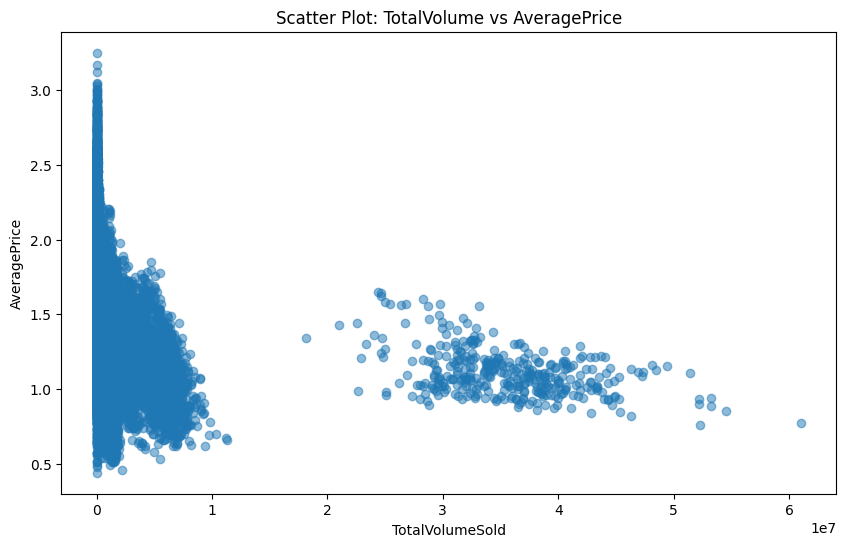

In [20]:
#Scatter Plot to Visualize Relationship
plt.figure(figsize=(10, 6))
plt.scatter(data['TotalVolume'], data['AveragePrice'], alpha=0.5)
plt.title('Scatter Plot: TotalVolume vs AveragePrice')
plt.xlabel('TotalVolumeSold')
plt.ylabel('AveragePrice')
plt.show()


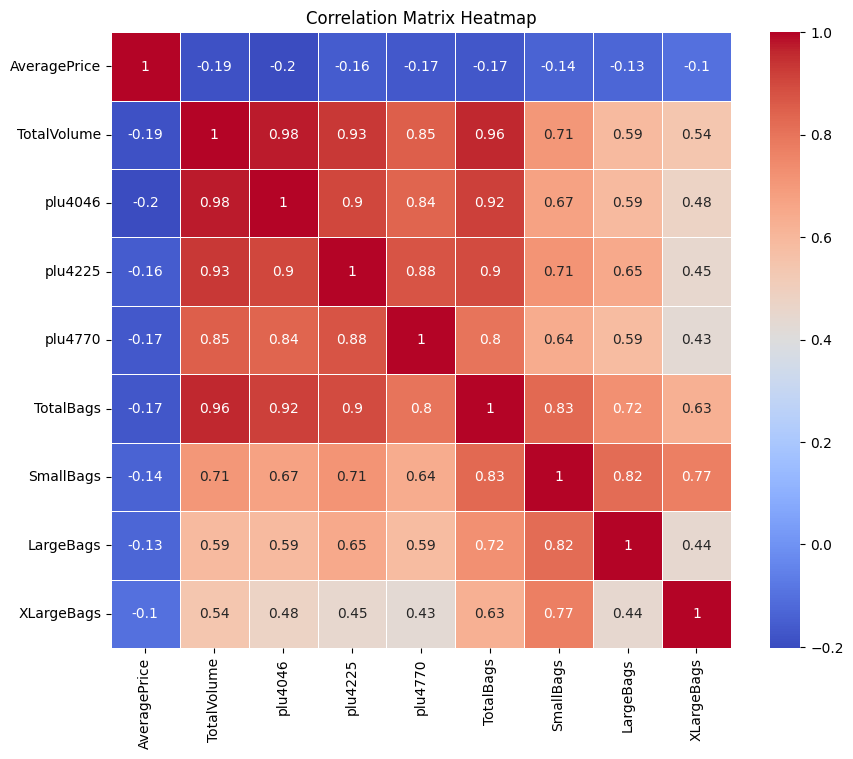

In [21]:
#Correlation Matrix and Heatmap

# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


### Reporting Processes for Avocado Sales and Pricing Analysis

---

#### 1. **Data Cleaning Report:**
   - **Issues Identified**: Addressed missing values, outliers, and inconsistent data (e.g., renaming columns, converting data types).
   - **Methods Used**: Handled missing values using mean/mode, removed duplicates, fixed data types.
   - **Final Dataset**: Summary of the cleaned data, including row/column counts.

**Tools**: Pandas, Jupyter Notebook.

---

#### 2. **Exploratory Data Analysis (EDA):**
   - **Summary Statistics**: Mean, median, and distribution of features like `AveragePrice` and `Total Volume`.
   - **Visualizations**: Histograms, scatter plots, and box plots to explore distributions and trends.
   - **Key Findings**: Trends such as price fluctuations, seasonal variations, and regional sales differences.

**Tools**: Matplotlib, Seaborn.

---

#### 3. **Visual Report:**
   - **Correlation Matrix**: Heatmap of variable correlations.
   - **Time Series Analysis**: Line charts for price and volume trends over time.
   - **Comparative Analysis**: Bar charts comparing regions and avocado types.

---

#### 4. **Executive Summary:**
   - **Price Trends**: Highlight price fluctuations over time.
   - **Regional Insights**: Regional demand and preferences.
   - **Seasonality**: Seasonal price and volume patterns.
   - **Recommendations**: Data-driven insights for pricing and stocking strategies.

---

**Deliverables**: 
- Jupyter Notebooks (documenting analysis and code).
- Visualizations in PDF or slides for stakeholder review.

**Tools**: Pandas, Matplotlib, Seaborn, PowerPoint.

---

This concise report summarizes the steps and tools used in the avocado sales and pricing analysis project.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [10]:
# Step 1: Define Correct Feature and Target Columns
features = ['TotalVolume', 'plu4046', 'plu4225', 'plu4770', 'type', 'region']  # Updated feature names
target = 'AveragePrice'

# Step 2: Check for Missing Columns
missing_columns = [col for col in features + [target] if col not in data.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Proceed if all required columns exist
    # Handle missing values
    data = data.dropna(subset=features + [target])

    # Step 3: One-Hot Encode Categorical Variables
    data = pd.get_dummies(data, columns=['type', 'region'], drop_first=True)

    # Step 4: Split into Train and Test Sets
    from sklearn.model_selection import train_test_split
    X = data.drop(columns=[target])
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 5: Train a Random Forest Regressor
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error, r2_score

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Step 6: Evaluate the Model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\nModel Evaluation:")
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

    # Step 7: Feature Importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    print("\nFeature Importance:")
    print(feature_importance)


Missing columns: ['type', 'region']


In [18]:
# Step 1: Define Features and Target
numerical_features = ['TotalVolume', 'plu4046', 'plu4225', 'plu4770', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']
categorical_features = ['type_organic'] + [col for col in data.columns if col.startswith('region_')]
features = numerical_features + categorical_features
target = 'AveragePrice'

# Step 2: Verify Columns and Drop Missing Data
missing_columns = [col for col in features + [target] if col not in data.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Drop rows with missing values in the selected features or target
    data = data.dropna(subset=features + [target])

    # Step 3: Train-Test Split
    from sklearn.model_selection import train_test_split
    X = data[features]
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 4: Train the RandomForestRegressor
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error, r2_score

    model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None)
    model.fit(X_train, y_train)

    # Step 5: Evaluate the Model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    print("\nModel Evaluation:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")

    # Step 6: Feature Importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print("\nFeature Importance:")
    print(feature_importance)



Model Evaluation:
Mean Squared Error (MSE): 0.02382497576183648
Root Mean Squared Error (RMSE): 0.15435341188919824
R-squared (R²): 0.8477814177914125

Feature Importance:
                        Feature  Importance
8                  type_organic    0.445913
1                       plu4046    0.085946
2                       plu4225    0.085772
4                     TotalBags    0.068206
0                   TotalVolume    0.066925
..                          ...         ...
64               region_TotalUS    0.000240
24            region_GreatLakes    0.000234
35              region_Midsouth    0.000181
11  region_BirminghamMontgomery    0.000140
34     region_MiamiFtLauderdale    0.000000

[68 rows x 2 columns]


In [14]:
print("Available Columns:", data.columns.tolist())



Available Columns: ['Date', 'AveragePrice', 'TotalVolume', 'plu4046', 'plu4225', 'plu4770', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type_organic', 'region_Atlanta', 'region_BaltimoreWashington', 'region_BirminghamMontgomery', 'region_Boise', 'region_Boston', 'region_BuffaloRochester', 'region_California', 'region_Charlotte', 'region_Chicago', 'region_CincinnatiDayton', 'region_Columbus', 'region_DallasFtWorth', 'region_Denver', 'region_Detroit', 'region_GrandRapids', 'region_GreatLakes', 'region_HarrisburgScranton', 'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis', 'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles', 'region_Louisville', 'region_Miami', 'region_MiamiFtLauderdale', 'region_Midsouth', 'region_Nashville', 'region_NewOrleans', 'region_NewYork', 'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando', 'region_PeoriaSpringfield', 'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsburgh', 'region_Plains', 'region

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [23]:
#Please use code cells to code in and do not forget to comment your code.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


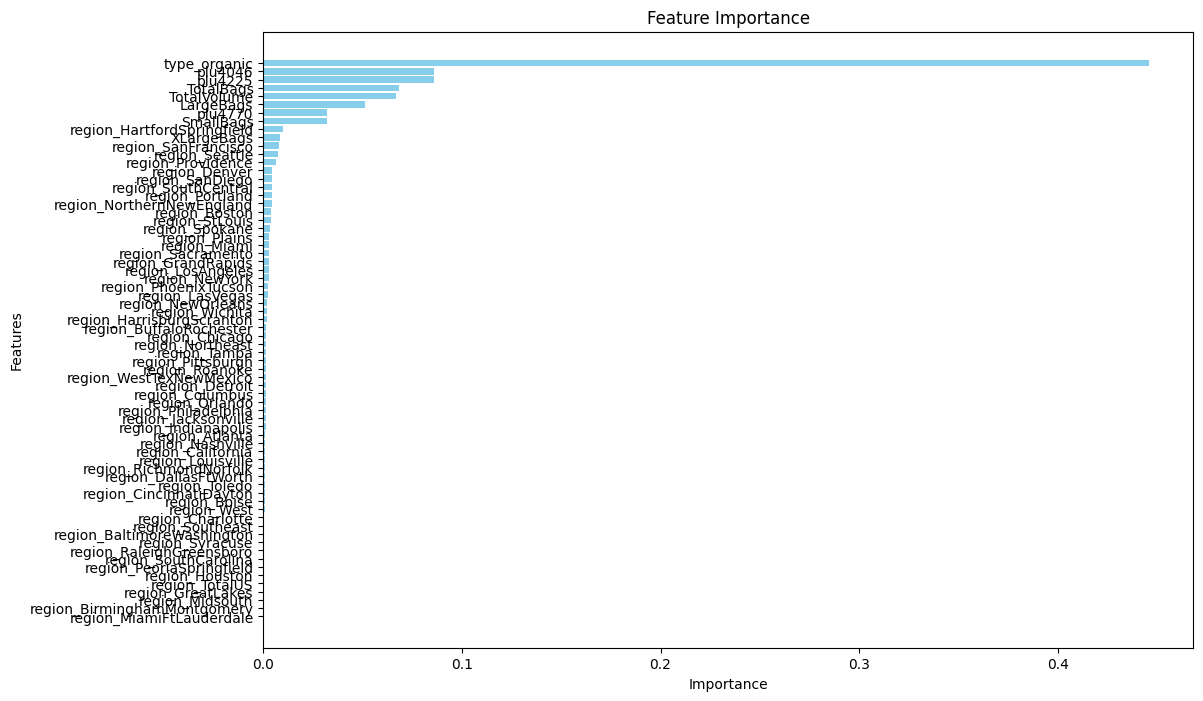

In [24]:
#Please use code cells to code in and do not forget to comment your code.
import matplotlib.pyplot as plt

# Feature importance visualization
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()


---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---



### Summary of Findings:
The analysis of the **Hass Avocado** dataset, specifically using a **RandomForestRegressor** model to predict **AveragePrice**, has provided valuable insights into the key drivers of avocado prices. The most important features influencing price predictions were:

1. **`type_organic`** – Organic avocados had a significant impact on price, as expected. The price of organic avocados tends to be higher compared to conventional ones.
2. **PLU Codes** (e.g., `plu4046`, `plu4225`, `plu4770`) – These product codes correspond to different varieties or sizes of avocados, which also influence the price, confirming that product differentiation is a critical factor.
3. **Sales Volume and Bags** – Features like **`TotalVolume`** and **`TotalBags`** (both large and small) were important in understanding pricing dynamics, as larger sales volumes can affect price due to supply-demand variations.
4. **Regional Factors** – Different regions had varying levels of influence on price. Certain areas may exhibit higher demand, which could result in higher prices, while others may have lower demand.

### Insights Gained:
- **Price Drivers**: The model confirmed that organic type and specific product codes are the most predictive of avocado pricing.
- **Regional Variability**: Prices appear to be influenced by geographical location, though the exact nature of this relationship may warrant further exploration (e.g., through regional supply chain analysis).
- **Sales Volume Effect**: There is an observable relationship between the volume of avocados sold and their price, which could help in inventory management and demand forecasting.

### Limitations:
1. **Data Gaps**: Although the dataset contains valuable variables, there may still be missing or unaccounted-for factors (such as seasonal trends, weather conditions, and international supply chain disruptions) that influence avocado prices.
2. **Regional Granularity**: While regional data is important, some regions (e.g., `region_TotalUS`) may introduce bias due to their larger data volumes compared to smaller regions.
3. **Temporal Factors**: The dataset only spans from 2015 to 2023, which may not capture longer-term trends, such as shifts in consumer preferences or long-term weather patterns affecting avocado yields.
4. **Feature Engineering**: The model relies on basic features without additional advanced metrics (e.g., promotional periods, price elasticity, or external market data), which could improve predictive power.

### Future Directions:
1. **Incorporating External Data**: Introducing additional data, such as **weather patterns**, **supply chain disruptions**, and **economic indicators**, could provide a more comprehensive model for avocado price forecasting.
2. **Improved Feature Engineering**: Exploring more sophisticated feature engineering (e.g., lagged features for seasonality, holiday adjustments) could enhance model accuracy.
3. **Model Comparison**: Testing other machine learning models (e.g., **Gradient Boosting Machines**, **XGBoost**, or **LightGBM**) could provide comparisons and ensure the RandomForestRegressor is the best choice for this task.
4. **Time Series Forecasting**: Given the temporal nature of the data, time series models like **ARIMA** or **LSTM (Long Short-Term Memory)** could be considered for forecasting future avocado prices based on past trends.

### Suggestions for Methodology Improvements:
1. **Cross-Validation**: Use cross-validation techniques (e.g., **K-fold cross-validation**) to ensure that the model is not overfitting and is generalizing well on unseen data.
2. **Feature Selection**: Explore **feature selection** techniques to identify the most influential predictors and reduce model complexity while improving interpretability.
3. **Ensemble Methods**: Combining predictions from multiple models (ensemble learning) could improve accuracy and robustness.

### Conclusion:
The RandomForestRegressor model has successfully identified key factors affecting avocado pricing. While this model provides valuable insights, future projects could benefit from more diverse datasets and advanced modeling techniques, ensuring that avocado price predictions become even more reliable and actionable.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
